#### [Source Insee](https://www.insee.fr/fr/statistiques/2540004)
> _Fichier de données nationales qui contient les prénoms attribués aux enfants nés en France hors Mayotte entre 1900 et 2018 et les effectifs par sexe associés à chaque prénom ;_

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
df = pd.read_csv('dpt2018.csv', sep=';')

In [5]:
df.annais.min()

'1900'

In [6]:
df[~df.annais.str.startswith('X')].annais.max()

'2018'

In [7]:
df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


In [8]:
name = "ELI"

In [9]:
df[df.preusuel == name].groupby('annais')[['nombre']].sum()

,nombre
annais,
1993,3
2004,3
2005,3
2006,11
2007,6
2008,6
2009,7
2010,11
2011,8


In [10]:
len(df[df.annais == 'XXXX'])

35608

In [11]:
df.index = df.annais

In [12]:
df.tail()

,sexe,preusuel,annais,dpt,nombre
annais,,,,,
2014,2,ÉYA,2014,69,3
XXXX,2,ÉYA,XXXX,XX,23
XXXX,2,ÏNAYA,XXXX,XX,21
XXXX,2,ÖZGE,XXXX,XX,30
XXXX,2,ÖZLEM,XXXX,XX,95


In [13]:
df[df.annais == 'XXXX']

,sexe,preusuel,annais,dpt,nombre
annais,,,,,
XXXX,1,A,XXXX,XX,27
XXXX,1,AADAM,XXXX,XX,27
XXXX,1,AADEL,XXXX,XX,55
XXXX,1,AADIL,XXXX,XX,175
XXXX,1,AAHIL,XXXX,XX,17
...,...,...,...,...,...
XXXX,2,ÉVY,XXXX,XX,89
XXXX,2,ÉYA,XXXX,XX,23
XXXX,2,ÏNAYA,XXXX,XX,21


In [14]:
df = df.drop(['XXXX'])

In [15]:
df = df.reset_index(drop=True)

In [16]:
df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,AADIL,1983,84,3
1,1,AADIL,1992,92,3
2,1,AAHIL,2016,95,3
3,1,AARON,1962,75,3
4,1,AARON,1976,75,3


In [17]:
df.annais = pd.to_numeric(df.annais)

In [18]:
df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,AADIL,1983,84,3
1,1,AADIL,1992,92,3
2,1,AAHIL,2016,95,3
3,1,AARON,1962,75,3
4,1,AARON,1976,75,3


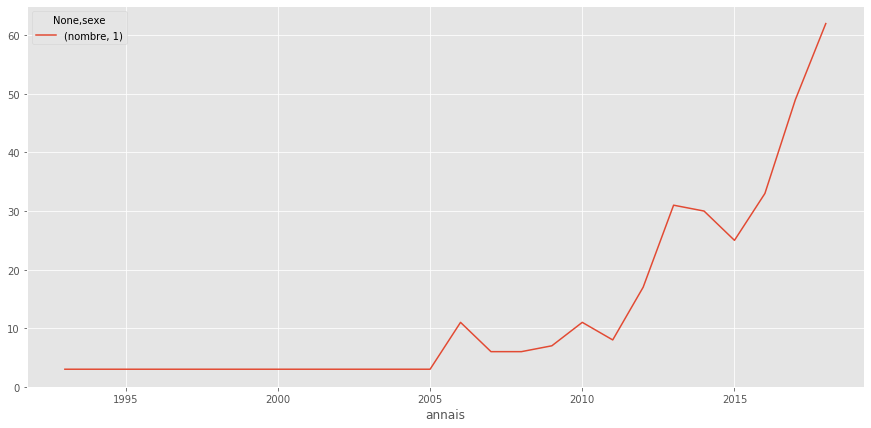

In [20]:
df[df.preusuel == name].groupby(['annais', 'sexe'])[['nombre']].sum().unstack(1).plot(figsize=(15,7), ylim=0)